# Computing Bootcamp II -- Geosci data (NetCDF, Xarray, metpy)
Giorgio Sarro - gmsarro@uchicago.edu

During our class so far we have covered several important ways of creating, opening and analyzing data. 
There are also several other methods to do the same using python, that can be better fit depending on the data that is used. 

Today we will explore NetCDF (Network Common Data Form) files, which are becoming the dominant data storage type in the geosciences, and other fields that use multivaribale and multidimentional datasets. We will see how to open them in different ways, explore it, create one. 
We will also use Xarray, which is similar to Pandas covered yesterday but more centered on numbers, and can handle multidimentions. 

In [68]:
import netCDF4 as nc
from netCDF4 import num2date
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units

# 1) NetCDF

## 1.1 Open 

We will open the netCDF that I sent:

In [128]:
files = nc.Dataset("Us2021.nc")
files

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    DATA_SOURCE: ECMWF: https://cds.climate.copernicus.eu, Copernicus Climate Data Store
    NETCDF_CONVERSION: CISL RDA: Conversion from ECMWF GRIB 1 data to netCDF4.
    NETCDF_VERSION: 4.7.4
    CONVERSION_PLATFORM: Linux r14i1n35 4.12.14-95.51-default #1 SMP Fri Apr 17 08:14:12 UTC 2020 (c6bab98) x86_64 x86_64 x86_64 GNU/Linux
    CONVERSION_DATE: Fri Sep  3 12:24:18 MDT 2021
    Conventions: CF-1.6
    NETCDF_COMPRESSION: NCO: Precision-preserving compression to netCDF4/HDF5 (see "history" and "NCO" global attributes below for specifics).
    NCO: netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    history: Thu Sep  9 07:35:11 2021: ncks -A Z.nc T.nc
Thu Sep  9 07:35:08 2021: ncrcat Z.2021062900_2021062923.nc Z.2021063000_2021063023.nc Z.nc
Thu Sep  9 07:35:06 2021: ncpdq -a time,level,latitude,longitude test.nc Z.2021062900_2021062923.nc
Thu Sep  9

Printing the file gives us an overview of the dimentions of the file, the name of variables, and the datatype of variables.

To access variables, we can use the `.variables` function

In [129]:
lats_storm = files.variables['latitude'][:]
lons_storm = files.variables['longitude'][:]
surface_500 = files.variables['Z'][:]
temperaure = files.variables['T'][:]
surface_500_storm = surface_500/9.81

Now our variables are familiar numpy arrays, that we can analyze and slice like we learned last week.

In [130]:
surface_500_sliced = surface_500_storm[:,2,:,:]
surface_500_sliced.shape

(48, 125, 281)

In [131]:
surface_500_sliced

masked_array(
  data=[[[1497.85888671875, 1497.9481201171875, 1498.343017578125, ...,
          1523.9036865234375, 1523.6361083984375, 1523.40673828125],
         [1498.1009521484375, 1498.1646728515625, 1498.521484375, ...,
          1523.91650390625, 1523.67431640625, 1523.4832763671875],
         [1498.585205078125, 1498.5723876953125, 1498.7890625, ...,
          1524.795654296875, 1524.6810302734375, 1524.6427001953125],
         ...,
         [1504.0006103515625, 1503.388916015625, 1502.6881103515625,
          ..., 1583.9444580078125, 1584.0845947265625, 1584.173828125],
         [1503.2232666015625, 1502.6243896484375, 1501.923583984375,
          ..., 1582.899658203125, 1583.039794921875, 1583.1290283203125],
         [1502.2930908203125, 1501.8216552734375, 1501.2227783203125,
          ..., 1581.829345703125, 1581.9439697265625,
          1582.0841064453125]],

        [[1496.292724609375, 1496.394775390625, 1496.7769775390625, ...,
          1526.0455322265625, 1526.007324

The only difference is with date variables:

In [132]:
date_storm = files.variables['time']      
date_storm = nc.num2date(date_storm[:], date_storm.units, date_storm.calendar)
date_storm

<ipython-input-132-4b49016fc685>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  date_storm = nc.num2date(date_storm[:], date_storm.units, date_storm.calendar)


masked_array(data=[cftime.DatetimeGregorian(2021, 6, 29, 0, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 1, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 2, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 3, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 4, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 5, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 6, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 7, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 8, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 9, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 10, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 11, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 12, 0, 0, 0),
                   cftime.DatetimeGregorian(2021, 6, 29, 13, 0, 0, 0),
                

Don't forget to close the opened file, because especially for heavy files, keeping it open will considerably slow down python.

In [133]:
files.close()

To read the date, we can use the following commands:

In [19]:
date_storm[0]

cftime.DatetimeGregorian(2021, 6, 29, 0, 0, 0, 0)

In [20]:
date_storm[0].month

6

In [21]:
date_storm[0].day

29

In [22]:
date_storm[0].hour

0

### Check #1:

Plot the temperature at the lowest level (0) at the 6th hour of August 29th:

## 1.2 Assign Units with Metpy and calculate

Using Metpy we can easly assign units to our datasets 

In [54]:
temperaure_1= temperaure[0,2,:,:] * units.degK

If we do not like the unit, we can easly convert it to something else.

In [55]:
temperaure_1[0,0]

294.31646728515625 <Unit('kelvin')>

In [60]:
temperaure_1[0,0].ito('degF')

In [107]:
temperaure_1[0,0]

70.09964111328122 <Unit('degree_Fahrenheit')>

When performing calculations, python will keep track of the assigned units:

In [101]:
a = 9.8 *units('m/s**2')
a

9.8 <Unit('meter / second ** 2')>

In [102]:
mass = 10 * units.kg
mass

10 <Unit('kilogram')>

In [103]:
force = a*mass
force

98.0 <Unit('kilogram * meter / second ** 2')>

### Other Metpy features:

Metpy has some useful calculation package, oftern very specific to the atmospheric science. reference: https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html
For example, we can calculate the dewpoint of the air:

Just before class, in Chicago (Midway airport) there were the following conditions:
- Temperature 62F
- Humidity 70%
- Dewpoint (calculated): 52F

Let's check if the airport did their calculations correctly: 

In [114]:
air_temp = 62 * units.degF
humidity= 0.7

dewpoint = mpcalc.dewpoint_from_relative_humidity(air_temp, humidity)
dewpoint.ito('degF')
dewpoint

52.11342050325152 <Unit('degree_Fahrenheit')>

### Check #2:

Calculate the dew point at the lowest level and at the first timestep of our netCDF file, then, plot it!


(hint: use the relative_humidity_from_mixing_ratio(pressure, temperature, mixing_ratio) formula to get the relative humidity first, sice we only have mixing ration (Q) in our data) https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.relative_humidity_from_mixing_ratio.html

## 1.3 Create your own netCDF

You can save you own data into a netCDF, first create the name of the file

In [122]:
name = 'my_netCDF.nc'
filez = nc.Dataset(name, 'w', format='NETCDF4')

Second, create the dimentions

In [123]:
time = filez.createDimension('time', None)
lat = filez.createDimension('lat', 10)
lon = filez.createDimension('lon', 10)

finally, create your variables, and assign units

In [124]:
times = filez.createVariable('time', 'f4', ('time',))
lats = filez.createVariable('lat', 'f4', ('lat',))
lons = filez.createVariable('lon', 'f4', ('lon',))
value = filez.createVariable('value', 'f4', ('time', 'lat', 'lon',))
value.units = 'Kelvin'

Now let's create some random data to fill our file

In [125]:
lats[:] = np.arange(40.0, 50.0, 1.0)
lons[:] = np.arange(-110.0, -100.0, 1.0)


value[0, :, :] = np.random.uniform(0, 100, size=(10, 10))
xval = np.linspace(0.5, 5.0, 10)
yval = np.linspace(0.5, 5.0, 10)
value[1, :, :] = np.array(xval.reshape(-1, 1) + yval)

Close the file (to save it):

In [125]:
filez.close()

Let's check that it worked:

In [126]:
files = nc.Dataset("my_netCDF.nc")
files

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(2), lat(10), lon(10)
    variables(dimensions): float32 time(time), float32 lat(lat), float32 lon(lon), float32 value(time,lat,lon)
    groups: 

looks good to me!

### Otherwise, you can also create a new netCDF file, copying the properties of a file that you already opened

In [145]:
files = nc.Dataset("Us2021.nc")

In [146]:
temperaure_1= (temperaure[:,0,:,:] - 273.15) * 9/5 + 32

In [152]:
# save file as netCDF
file_tend = nc.Dataset("Copy.nc", "w", format='NETCDF4')

# copy attributes from first file
file_tend.setncatts(files.__dict__)
# copy dimensions from zg file
for name, dimension in files.dimensions.items():
        file_tend.createDimension(name, len(dimension) if not dimension.isunlimited() else None)



files.close()

#Add to the file the calculation that you created
surface_t = file_tend.createVariable('tend', 'f4', ("time","latitude","longitude"))
surface_t.units = "F"
surface_t.long_name = "temperature near the surface converted to degrees F"
surface_t[:,:,:] = temperaure_1

file_tend.close()

<ipython-input-152-659f51b7f1ad>:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file_tend.setncatts(files.__dict__)


Again, let's check

In [153]:
files = nc.Dataset("Copy.nc")
files

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    DATA_SOURCE: ECMWF: https://cds.climate.copernicus.eu, Copernicus Climate Data Store
    NETCDF_CONVERSION: CISL RDA: Conversion from ECMWF GRIB 1 data to netCDF4.
    NETCDF_VERSION: 4.7.4
    CONVERSION_PLATFORM: Linux r14i1n35 4.12.14-95.51-default #1 SMP Fri Apr 17 08:14:12 UTC 2020 (c6bab98) x86_64 x86_64 x86_64 GNU/Linux
    CONVERSION_DATE: Fri Sep  3 12:24:18 MDT 2021
    Conventions: CF-1.6
    NETCDF_COMPRESSION: NCO: Precision-preserving compression to netCDF4/HDF5 (see "history" and "NCO" global attributes below for specifics).
    NCO: netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    history: Thu Sep  9 07:35:11 2021: ncks -A Z.nc T.nc
Thu Sep  9 07:35:08 2021: ncrcat Z.2021062900_2021062923.nc Z.2021063000_2021063023.nc Z.nc
Thu Sep  9 07:35:06 2021: ncpdq -a time,level,latitude,longitude test.nc Z.2021062900_2021062923.nc
Thu Sep  9

# 2) Xarray

![title](xarray.png) 

Xarray is a great tool to use for multidimentional data, similar to Pandas, but more specific to nubers (also, Pandas struggles with too many dimentions)

Let's first create our own xarray:

In [157]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.55552681, -1.41671369,  0.0119204 ],
       [-1.55825485,  0.80325164, -2.09507046]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

As you can see, Xarray understands coordinates pretty well.

We can slice it like a normal array:

In [159]:
data[0, :]

<xarray.DataArray (y: 3)>
array([-0.55552681, -1.41671369,  0.0119204 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

Math works like in a normal array, with the advantage of keeping track of the dimentions:

In [165]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[ 9.44447319,  8.58328631, 10.0119204 ],
       [ 8.44174515, 10.80325164,  7.90492954]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [167]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[-0.55552681, -1.55825485],
       [-1.41671369,  0.80325164],
       [ 0.0119204 , -2.09507046]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

We can perform calculations in Pandas-like fashion

In [168]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([-1.05689083, -0.30673102, -1.04157503])
Dimensions without coordinates: y

In [170]:
labels = xr.DataArray(["E", "F", "E"], [data.coords["y"]], name="labels")
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.27180321, -1.41671369],
       [-1.82666266,  0.80325164]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

And also like pandas, we can easily plot:

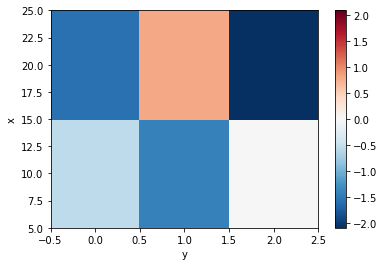

In [171]:
data.plot()

## 2.2 Xarray and netCDF

We can use Xarray to open netCDF files, which can save a lot of time.

In [172]:
files = xr.open_dataset("Us2021.nc")

In [173]:
files

<xarray.Dataset>
Dimensions:    (latitude: 125, level: 5, longitude: 281, time: 48)
Coordinates:
  * latitude   (latitude) float64 51.0 50.75 50.5 50.25 ... 20.5 20.25 20.0
  * level      (level) float64 500.0 700.0 850.0 900.0 1e+03
  * longitude  (longitude) float64 228.0 228.2 228.5 228.8 ... 297.5 297.8 298.0
  * time       (time) datetime64[ns] 2021-06-29 ... 2021-06-30T23:00:00
Data variables:
    T          (time, level, latitude, longitude) float32 ...
    Q          (time, level, latitude, longitude) float32 ...
    U          (time, level, latitude, longitude) float32 ...
    V          (time, level, latitude, longitude) float32 ...
    Z          (time, level, latitude, longitude) float32 ...
Attributes:
    DATA_SOURCE:                ECMWF: https://cds.climate.copernicus.eu, Cop...
    NETCDF_CONVERSION:          CISL RDA: Conversion from ECMWF GRIB 1 data t...
    NETCDF_VERSION:             4.7.4
    CONVERSION_PLATFORM:        Linux r14i1n35 4.12.14-95.51-default #1 SMP F...
    CONVERSION_DATE:            Fri Sep  3 12:24:18 MDT 2021
    Conventions:                CF-1.6
    NETCDF_COMPRESSION:         NCO: Precision-preserving compression to netC...
    NCO:                        netCDF Operators version 4.9.2 (Homepage = ht...
    history:                    Thu Sep  9 07:35:11 2021: ncks -A Z.nc T.nc\n...
    history_of_appended_files:  Thu Sep  9 07:35:11 2021: Appended file Z.nc ...

Many python built-in calculations on multidimentional data, ask for the dataset to be in xarray format 

We can select the variables like this:

In [180]:
Z = files.Z
Z

<xarray.DataArray 'Z' (time: 48, level: 5, latitude: 125, longitude: 281)>
array([[[[57440.52  , ..., 56264.02  ],
         ...,
         [57697.02  , ..., 58009.52  ]],

        ...,

        [[  915.2656, ...,  1432.8906],
         ...,
         [ 1135.1406, ...,  1720.1406]]],


       ...,


       [[[56650.254 , ..., 55516.004 ],
         ...,
         [57634.504 , ..., 58034.004 ]],

        ...,

        [[ 1559.0664, ...,  1188.4414],
         ...,
         [ 1213.3164, ...,  1505.3164]]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 51.0 50.75 50.5 50.25 ... 20.5 20.25 20.0
  * level      (level) float64 500.0 700.0 850.0 900.0 1e+03
  * longitude  (longitude) float64 -132.0 -131.8 -131.5 ... -62.5 -62.25 -62.0
  * time       (time) datetime64[ns] 2021-06-29 ... 2021-06-30T23:00:00
Attributes:
    long_name:                     Geopotential
    short_name:                    z
    units:                         m**2 s**-2
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               129
    minimum_value:                 -4732.4844
    maximum_value:                 493124.88
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric pressure level analysis [...
    number_of_significant_digits:  7

We can also plot using metpy:

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


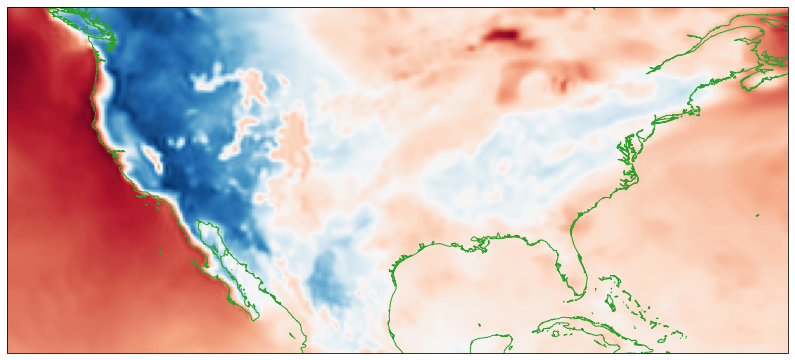

In [187]:
data_var = files.metpy.parse_cf('T')

x = data_var.longitude
y = data_var.latitude
im_data = data_var.isel(time=0).sel(level=1000.)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)

ax.imshow(im_data, extent=(x.min(), x.max(), y.min(), y.max()),
          cmap='RdBu', origin='lower' if y[0] < y[-1] else 'upper')
ax.coastlines(color='tab:green', resolution='10m')


plt.show()

### Check #3

Plot the temperature at the lowest level (0) at the 6th hour of August 29th using xarray+ metpy